The is basic simulation implementation of the Ising model used for the simplified moduling of magnetic spin. 
This code is not opitmised and is intended for demonstrative purposes only.

Some more opitmised code can be provided upon request: ddgarvey@gmail.com

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation
import random
from mpl_toolkits.mplot3d import Axes3D

To start I defined the class IslingModel which stored array and all fucntions neccesary

In [ ]:
class IsingModel:
    def __init__(self, temperature=1.0, dim=50, J=1, h=0, grid_type="square"):
        #Initialising given parameters of Lattice
        self.T=temperature
        self.dim=dim
        self.grid_type=grid_type
        self.h=h
        self.J=J
        
        #create a random lattice
        if(self.grid_type=="square") or (self.grid_type=="triangular"):
            self.present_state=2*np.random.randint(2,size=(self.dim,self.dim)) - 1 
        if(self.grid_type=="3D"):
            self.present_state=2*np.random.randint(2,size=(self.dim,self.dim,self.dim)) - 1 
        if(self.grid_type=="NiO"):
            self.present_state=np.array([[(2*np.random.randint(2) - 1)*((i+j)%2) for j in range(self.dim)] for i in range(self.dim)])
        
        #calculate all initial quantities
        self.present_energy=self.Energy()
        self.present_sqenergy=self.Energy()**2
        self.meanenergy=self.Energy()
        self.present_mag=self.magnet()
    
    #function to bring the sytem to equilibirum 
    def solve(self):
        #For readability/convenience initialise some varibles as shorthand
        M=self.present_state 
        N=self.dim
        T=self.T

        if (self.grid_type=="square") or (self.grid_type=="triangular") or (self.grid_type=="NiO"):
            for i in range(100):
                for x in range(N):
                    for y in range(N):
                        s=M[x,y] #convience 
                        nb=self.nb(x,y)
                        deltaE=float(2*s*nb + 2*self.h*s)
                        if deltaE<=0:
                            s*=-1
                            self.present_energy+=deltaE
                            self.present_mag+=(2.0*self.present_state[x,y])/N**2
                        elif np.exp(-deltaE/self.T)>random.random():
                            s*=-1
                            self.present_energy+=deltaE
                            self.present_mag+=(2.0*self.present_state[x,y])/N**2
                        M[x,y]=s
        if(self.grid_type=="3D"):
            for i in range(50):
                for x in range(N):
                    for y in range(N):
                        for z in range(N):
                            s=M[x,y,z] #convience 
                            nb=self.nb(x,y,z)
                            deltaE=float(2*s*nb + 2*self.h*s)
                            if deltaE<=0:
                                s*=-1
                                self.present_energy+=deltaE
                                self.present_mag+=(2.0*self.present_state[x,y,z])/N**3
                            elif np.exp(-deltaE/T)>random.random():
                                s*=-1
                                self.present_energy+=deltaE
                                self.present_mag+=(2.0*self.present_state[x,y,z])/N**3
                            M[x,y,z]=s
        self.present_state=M

#function to calculate the nearest neighbours
    def nb(self, i , j, k=0):
        M=self.present_state
        
        if (self.grid_type == "square"):
            nb=self.J*(M[(i+1)%self.dim,j] + M[(i-1)%self.dim,j] + M[i,(j+1)%self.dim] + M[i,(j-1)%self.dim])
            
        if (self.grid_type == "triangular"):
            nb=self.J*(M[(i+1)%self.dim,j] + M[(i-1)%self.dim,j] + M[(i+(j+1)%2 - (j)%2)%self.dim,(j+1)%self.dim]+ M[i,(j+1)%self.dim] + M[i,(j-1)%self.dim]+ M[(i+(j+1)%2 - (j)%2)%self.dim,(j-1)%self.dim])
        
        if (self.grid_type == "3D"):
            nb=self.J*(M[(i+1)%self.dim,j,k] + M[(i-1)%self.dim,j,k] + M[i,(j+1)%self.dim, k] + M[i,(j-1)%self.dim, k] + M[i, j, (k+1)%self.dim] + M[i,j,k%self.dim])
        
        if (self.grid_type=="NiO"):
            nb=self.J[1]*(M[(i+2)%self.dim,j] + M[(i-2)%self.dim,j] + M[i,(j+2)%self.dim] + M[i,(j-2)%self.dim]) +self.J[0]*(M[(i+1)%self.dim,(j+1)%self.dim] + M[(i+1)%self.dim,(j-1)%self.dim] + M[(i-1)%self.dim,(j+1)%self.dim] + M[(i-1)%self.dim,(j-1)%self.dim])
        
        return nb

#function to perform a single sweep of the lattice
    def single_update(self):
        #For convience/readability
        N=self.dim
        T=self.T
        M=self.present_state
        
        if(self.grid_type=="square" or self.grid_type=="triangular" or self.grid_type=="NiO"):
            for x in range(N):
                for y in range(N):
                    s=M[x,y]
                    nb=self.nb(x,y)
                    deltaE=float(2*s*nb + 2*self.h*s)
                    if deltaE<=0:
                        s*=-1
                        self.present_energy+=deltaE
                        self.present_mag+=(2.0*self.present_state[x,y])/N**2
                    elif np.exp(-deltaE/self.T)>random.random():
                        s*=-1
                        self.present_energy+=deltaE
                        self.present_mag+=(2.0*self.present_state[x,y])/N**2
                    M[x,y]=s

        if(self.grid_type=="3D"):
            for x in range(N):
                for y in range(N):
                    for z in range(N):
                        s=M[x,y,z]
                        nb=self.nb(x,y,z)
                        deltaE=float(2*s*nb + 2*self.h*s)
                        if deltaE<=0:
                            s*=-1
                            self.present_energy+=deltaE
                            self.present_mag+=(2.0*self.present_state[x,y])/N**3
                        elif np.exp(-deltaE/self.T)>random.random():
                            s*=-1
                            self.present_energy+=deltaE
                            self.present_mag+=(2.0*self.present_state[x,y])/N**3
                        M[x,y,z]=s
        self.present_state=M

#Function to calculate the total energy of the lattice
    def Energy(self):
        N=self.dim
        M=self.present_state
        
        e=0
        
        if(self.grid_type=="square") or (self.grid_type=="triangular") or (self.grid_type=="NiO"):
            for x in range(N):
                for y in range(N):
                    e+= -M[x,y]*self.nb(x,y) - self.h*M[x,y]
        
        if(self.grid_type=="3D"):
            for x in range(N):
                for y in range(N):
                    for z in range(N):
                        e+= -M[x,y,z]*self.nb(x,y,z) - self.h*M[x,y,z]
        
        e=(1.0/2.0)*(float(e))
        return e

#Function to calculate the average magnetisation per spin site
    def magnet(self):
        N=self.dim
        M=self.present_state
        
        m=0
        if(self.grid_type=="square") or (self.grid_type=="triangular") or (self.grid_type=="NiO"):
            for x in range(N):
                for y in range(N):
                    m+=M[x,y]

            m=float(m)/N**2
        if(self.grid_type=="3D"):
            for z in range(N):
                for y in range(N):
                    for x in range(N):
                        m+=M[x,y,z]
            m=float(m)/N**3
        return m

# Function to plot lattice 
    def plot(self, fig):
        if(self.grid_type=="square") or (self.grid_type=="NiO"):
            g=fig.imshow(self.present_state, cmap = plt.cm.gray)
            fig.set_xticks([])
            fig.set_yticks([])
        
        if(self.grid_type=="3D"):
            x=np.linspace(0,M.dim, M.dim)
            points=np.meshgrid(x,x,x)
            
            g=fig.scatter(points[0],points[1],points[2], c=M.present_state.reshape(1,M.dim*M.dim*M.dim)[0],edgecolors="k", s=700)
            fig.set_xticks([])
            fig.set_yticks([])
        
        if(self.grid_type=="triangular"):
            points=np.array([[a+(b%2)*0.5, b*np.sqrt(3)/2] for a in np.linspace(0,M.dim, M.dim) for b in np.linspace(0,M.dim-1, M.dim)])
            g=fig.scatter(points[:,0],points[:,1], c=M.present_state.reshape(1,M.dim*M.dim)[0],s=20)
        
        return g
    
#Function used to animate the solving of the lattice
    def animate(self, i,g):
        self.single_update()
        print(i)
        if(self.grid_type=="triangular"):
            g.set_array(self.present_state.reshape(1,M.dim*M.dim)[0])
        if(self.grid_type=="square") or (self.grid_type=="NiO"):
            g.set_array(self.present_state)
        if(self.grid_type=="3D"):
            g.set_array(self.present_state.reshape(1,M.dim*M.dim*M.dim)[0])
        return g, 


In [ ]:
#Example of Metropolis algrotim bringing a 2D square lattice to equilbirium
M=IsingModel(temperature=2.0, dim=500)
fig=plt.figure(figsize=(10,5))

fig1=fig.add_subplot(121)
fig1.set_title("Initial Configuration")
M.plot(fig1)

M.solve()#Bringing lattice to equilibirium

fig2=fig.add_subplot(122)
fig2.set_title("Configuration after 100th iteration")
M.plot(fig2)

#black and white represent spin up(1) and spin down(-1) respectively
plt.show()

<IPython.core.display.Javascript object>


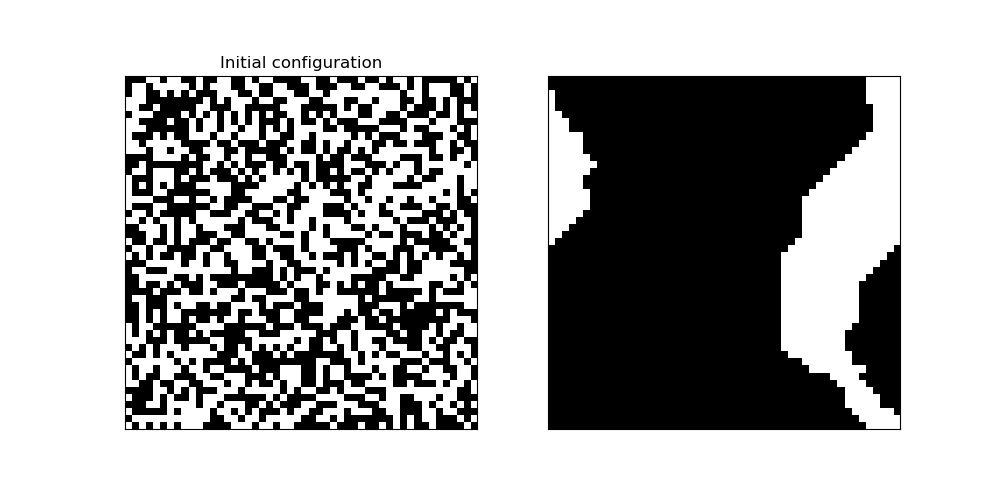

In [5]:
#animate the solving of a lattice

M=IsingModel(temperature=.5, dim=50)

fig=plt.figure(figsize=(10,5))

fig1=fig.add_subplot(121)
fig1.set_title("Initial configuration")
g1=M.plot(fig1)

fig2=fig.add_subplot(122)
g2=M.plot(fig2)

#FuncAnimation used to animate the solving of the matrix
ani = animation.FuncAnimation(fig, M.animate,interval=200,frames=100, blit=True, repeat=False, fargs=(g2,))

plt.show()

<IPython.core.display.Javascript object>


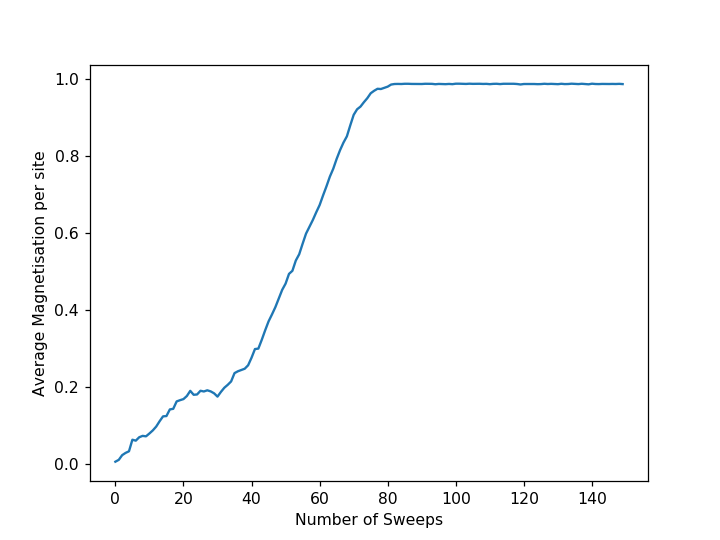

In [231]:
#Determine the number of sweeps to get to equilibrium 

M=IsingModel(temperature=1.0, dim=100)

mag=[]
N=[]

for i in range(150):
    mag.append(abs(M.present_mag))
    N.append(i)
    M.single_update()

plt.figure()
plt.plot(N, mag)
plt.ylabel("Average Magnetisation per site")
plt.xlabel("Number of Sweeps")
plt.show()

# Code intended for demonstration not same accuracy as used in report

In [448]:
#Calculating a number of obserables

#Initialise empty lists to store data
Amag=[]
Amagerr=[]
Aenergy=[]
Aenergyerr=[]
heatcapacity=[]
heatcapacityerr=[]
susceptibility=[]
susceptiblityerr=[]


Tdata=np.linspace(1.0, 10.0, 10)#Temperature data set


for T in Tdata:
    print(T) #To indicate progress of code 
    
    #For storage
    data=[]
    test=[]
    
    #Find solution configuration for a number of random configuration to get an average
    for i in range(100):
        M=IsingModel(temperature=T, dim=10, grid_type="square")
        M.solve()
        data.append([abs(M.present_mag), M.present_energy/100, (1.0/(T))*(1-(M.present_mag)**2)])
        test.append(abs(M.present_mag))
    
    #calculate standard devation of data set
    sd=np.std(test)
    
    #Neglecting outliers of data set
    mean=sum(test)/100
    neglectingOutliers = np.array([data[i] for i in range(100) if (abs(test[i] - mean)<sd)])
    mean=sum(list(neglectingOutliers))/len(neglectingOutliers)
    
    Amag.append(mean[0])
    Aenergy.append(mean[1])
    susceptibility.append(mean[2])
    
    data= np.array(data).transpose().tolist()
    
    #Create errorbars indicating the neglected outliers
    Amagerr.append(np.std(data[0]))
    Aenergyerr.append(np.std(data[1]))
    susceptiblityerr.append(np.std(data[2]))

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


Code used to average over a number of states for finding the average of a number of states in caculating the specific heat capacity was done in a similar fashion to the code above but is too expensive computation to be included.

In [353]:
heatcapacity=[]


for T in Tdata:
    print(T)#indicate progress
    
    E=0
    sqE=0
    data=[]
    test=[]
    
    M=IsingModel(temperature=T, dim=10)
    
    #Bring to equilibirum
    M.solve()
    
    #Calculate average values of energy and energy squared over thermal fluxuations
    for i in range(200):
        E+=M.present_energy
        sqE+=M.present_energy**2
        M.single_update()
    E=E/(200*M.dim**2)
    sqE=sqE/(200*M.dim**4)
    
    data.append((sqE-E**2)/(T**2))
    heatcapacity.append(data)

0.5
0.8888888888888888
1.2777777777777777
1.6666666666666667
2.0555555555555554
2.4444444444444446
2.8333333333333335
3.2222222222222223
3.611111111111111
4.0


<IPython.core.display.Javascript object>


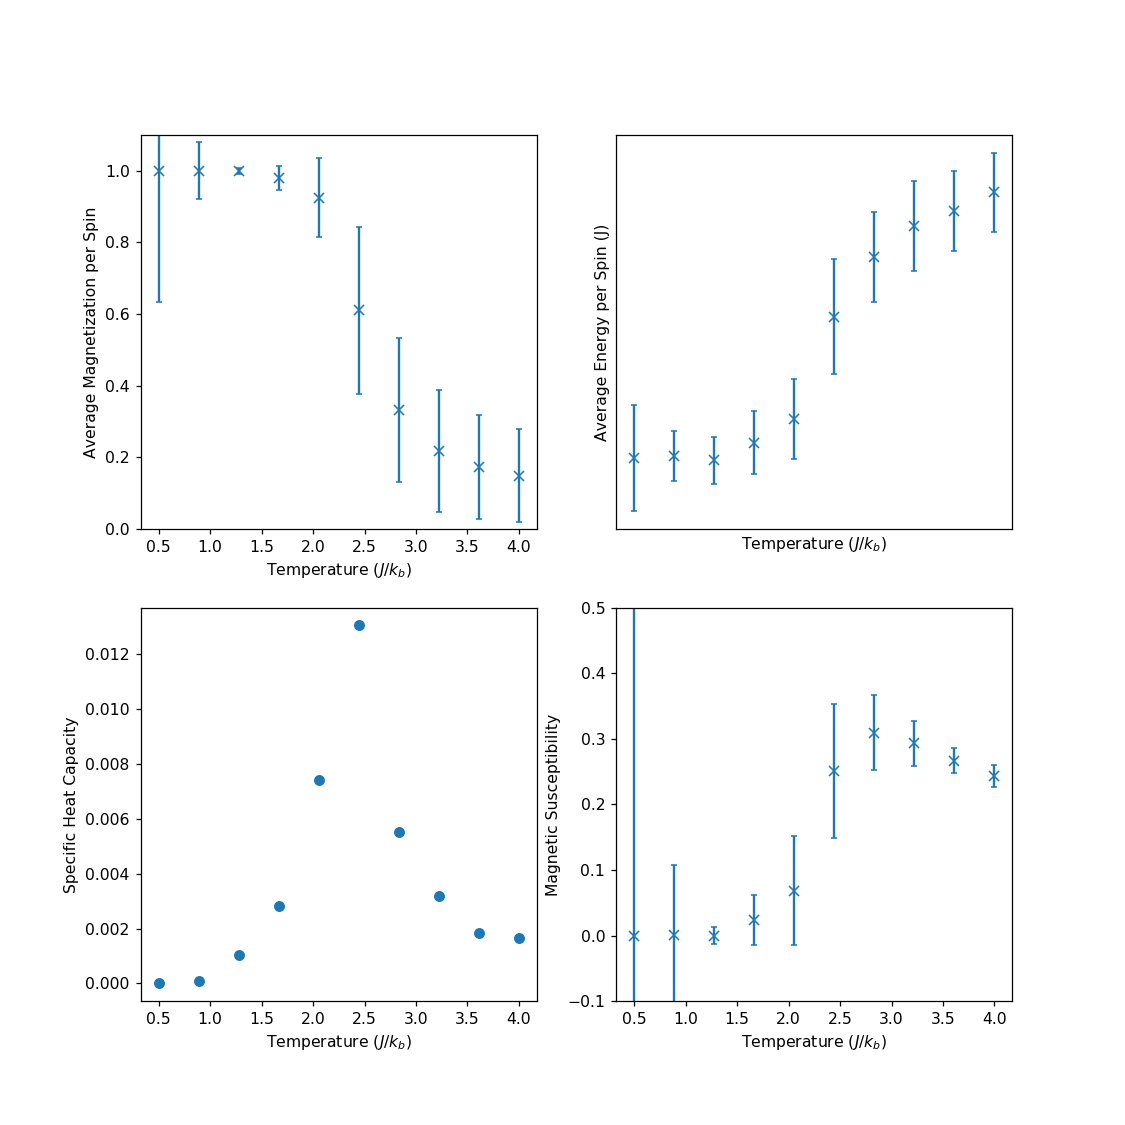

In [358]:
#Fit a line to data and determine line of greatest slope to approximate the Curie Temperature 
m=1
for i in range(len(Amag)-3):
    xd=[Tdata[i+n] for n in range(3)]
    yd=[Amag[i+n] for n in range(3)]
    if np.polynomial.polynomial.polyfit(xd, yd, 1)[1]<m:
        A=np.polynomial.polynomial.polyfit(xd, yd, 1)[0]
        B=np.polynomial.polynomial.polyfit(xd, yd, 1)[1]
        m=B
        Tc=Tdata[i]

#Plot data accumulated
fig=plt.figure(figsize=(10,10))
fig1=fig.add_subplot(2,2,1)
plt.xlabel("Temperature ($J/k_b)$")
plt.ylabel("Average Magnetization per Spin")
plt.errorbar(Tdata,Amag,yerr=Amagerr, fmt='x',capsize=2)
#plt.plot(Tdata, A + Tdata*B, "--")
plt.ylim([0,1.1])

fig2=fig.add_subplot(2,2,2)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Average Energy per Spin (J)")
plt.errorbar(Tdata,Aenergy,yerr=Aenergyerr, fmt="x",capsize=2)

fig3=fig.add_subplot(2,2,3)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Specific Heat Capacity")
plt.plot(Tdata, heatcapacity, "o")

fig4=fig.add_subplot(2,2,4)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Magnetic Susceptibility")
plt.errorbar(Tdata, susceptibility,yerr=susceptiblityerr, fmt="x",capsize=2)
plt.ylim([-0.1,0.5])

plt.show()

# Varying Magnetic Field

In [780]:
#Determining the effects of a varying magnetic field on ferromagentic substance

#create data set that returns to initial value to create loop
hdata=list(np.linspace(-3,3, 10)) + list(np.linspace(3,-3, 10)) 

mag=[]
energy=[]
M=IsingModel(h=-1, dim=10, grid_type="square", J=1)


for h in hdata:
    data=[]
    M.h=h
    M.solve()# bring to equilibirum 
    
    #store data to graph
    mag.append(M.present_mag)
    energy.append(M.Energy()/M.dim**2)

-3.0
-2.3333333333333335
-1.6666666666666667
-1.0
-0.3333333333333335
0.33333333333333304
1.0
1.666666666666666
2.333333333333333
3.0
3.0
2.3333333333333335
1.6666666666666667
1.0
0.3333333333333335
-0.33333333333333304
-1.0
-1.666666666666666
-2.333333333333333
-3.0


<IPython.core.display.Javascript object>


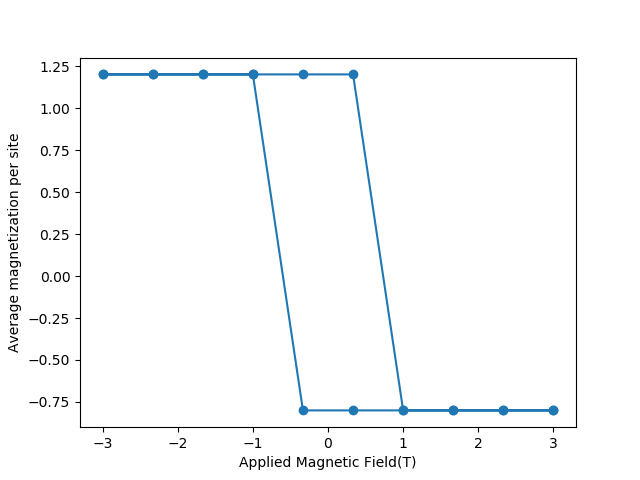

<IPython.core.display.Javascript object>


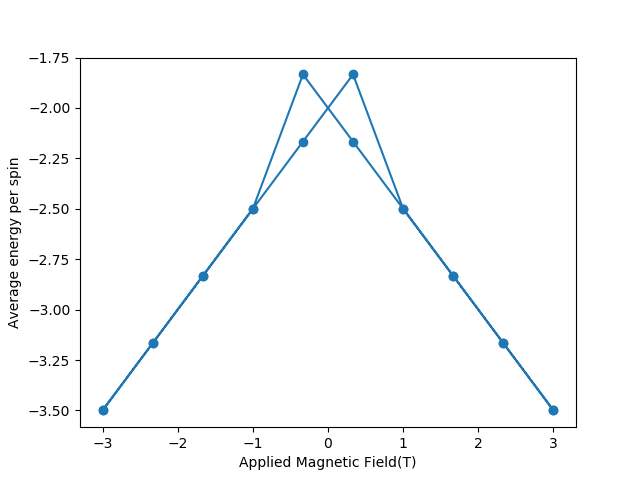

In [781]:
#plot data
plt.figure()
plt.plot(hdata,mag, "-o")
plt.xlabel("Applied Magnetic Field(T)")
plt.ylabel("Average magnetization per site")

plt.figure()
plt.plot(hdata, energy, "-o")
plt.xlabel("Applied Magnetic Field(T)")
plt.ylabel("Average energy per spin")


plt.show()

In [782]:
#effects of magnetic field on anti-ferromagnetic substance
#j<0

#create data set that returns to initial value to create loop
hdata=list(np.linspace(-3,3, 10)) + list(np.linspace(3,-3, 10)) 

mag=[]
energy=[]
M=IsingModel(h=-1, dim=10, grid_type="square", J=-1)


for h in hdata:
    data=[]
    M.h=h
    M.solve()# bring to equilibirum 
    
    #store data to graph
    mag.append(M.present_mag)
    energy.append(M.Energy()/M.dim**2)

-3.0
-2.3333333333333335
-1.6666666666666667
-1.0
-0.3333333333333335
0.33333333333333304
1.0
1.666666666666666
2.333333333333333
3.0
3.0
2.3333333333333335
1.6666666666666667
1.0
0.3333333333333335
-0.33333333333333304
-1.0
-1.666666666666666
-2.333333333333333
-3.0


<IPython.core.display.Javascript object>


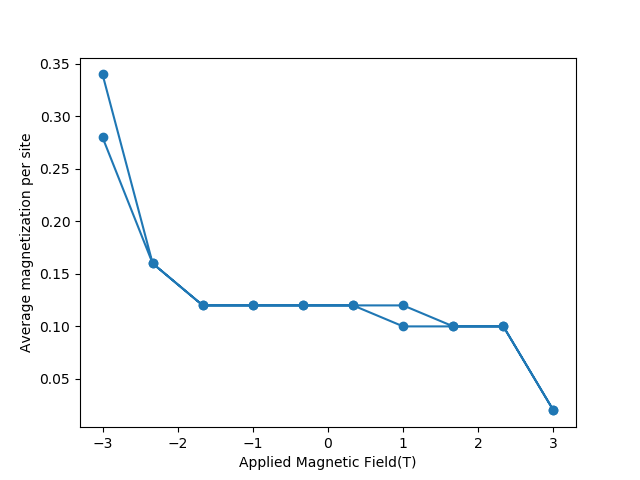

<IPython.core.display.Javascript object>


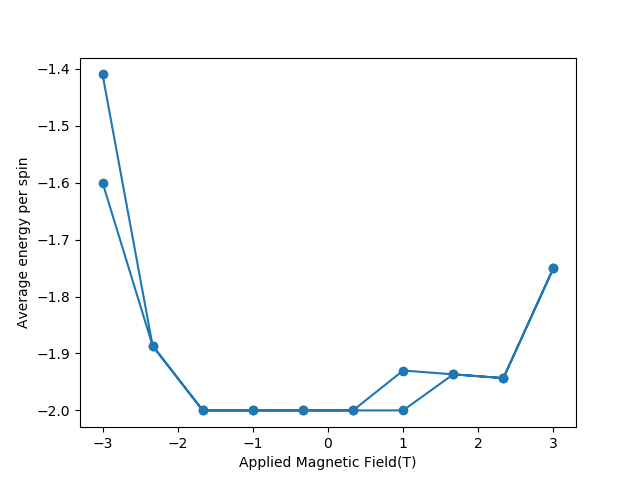

In [783]:
#plot data
plt.figure()
plt.plot(hdata,mag, "-o")
plt.xlabel("Applied Magnetic Field(T)")
plt.ylabel("Average magnetization per site")

plt.figure()
plt.plot(hdata, energy, "-o")
plt.xlabel("Applied Magnetic Field(T)")
plt.ylabel("Average energy per spin")


plt.show()

# 3D Cubic Lattice

In [1]:
#Plotting examples of equilibirum states at two different temperatures
M=IsingModel(temperature=7.0, dim=10, grid_type="3D")
M.solve()

#create 3D figure to plot in 
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_title("Equilibrium Configuration at $7.0$ J/$k_b$")
g1=M.plot(ax1)


#---------------------------------------------------------------------------------------------------------------

M=IsingModel(temperature=3.0, dim=10, grid_type="3D")
M.solve()

#create 3D figure to plot in 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

g2=M.plot(ax2)
ax2.set_title("Equilibrium Configuration at $3.0$ J/$k_b$")
plt.show()

NameError: name 'IsingModel' is not defined

<IPython.core.display.Javascript object>


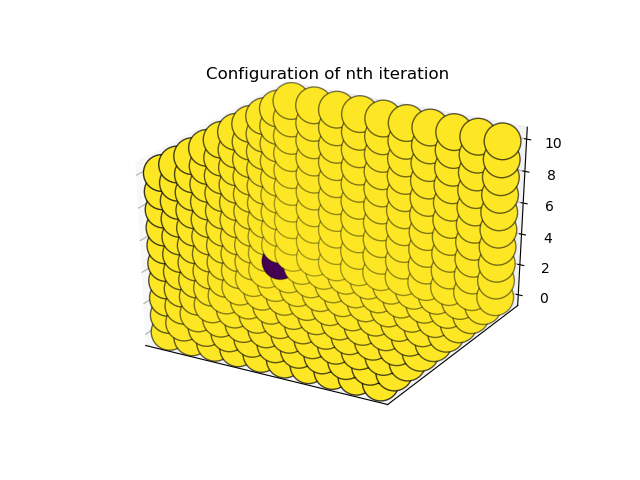

In [6]:
#Function to animate the solving of the lattice
M=IsingModel(temperature=1.5, dim=10, grid_type="3D")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
g=M.plot(ax)

ax.set_title("Configuration of nth iteration")
ani = animation.FuncAnimation(fig, M.animate,interval=100,frames=100, blit=True, repeat=False, fargs=(g,))
plt.show()

In [754]:
#Calculating a number of obserables

#Initialise empty lists to store data
Amag=[]
Amagerr=[]
Aenergy=[]
Aenergyerr=[]
susceptibility=[]
susceptiblityerr=[]


Tdata=np.linspace(1.0, 10.0, 10)#Temperature data set

for T in Tdata:
    print(T)#To indicate progress of code
    
    #For storage
    data=[]
    test=[]
    
    #Find solution configuration for a number of random configuration to get an average
    for i in range(10):
        M=IsingModel(temperature=T, dim=10, grid_type="3D")
        M.solve()
        data.append([abs(M.present_mag), M.present_energy/100, (1.0/(T))*(1-(M.present_mag)**2)])
        test.append(abs(M.present_mag))
    #calculate standard devation of data set
    sd=np.std(test)
    
    #Neglecting outliers of data set
    mean=sum(test)/10
    neglectingOutliers = np.array([data[i] for i in range(10) if (abs(test[i] - mean)<=sd)])
    mean=sum(list(neglectingOutliers))/len(neglectingOutliers)
    
    #store data to plot
    Amag.append(mean[0])
    Aenergy.append(mean[1])
    susceptibility.append(mean[2])
    
    data= np.array(data).transpose().tolist()
    
    #Create errorbars indicating the neglected outliers
    Amagerr.append(np.std(data[0]))
    Aenergyerr.append(np.std(data[1]))
    susceptiblityerr.append(np.std(data[2]))

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [796]:
heatcapacity=[]

for T in Tdata:
    print(T)
    E=0
    sqE=0
    data=[]
    test=[]
    M=IsingModel(temperature=T, dim=10, grid_type="3D")
    M.solve()
    for i in range(200):
        E+=M.present_energy
        sqE+=M.present_energy**2
        M.single_update()
    E=E/(200*M.dim**2)
    sqE=sqE/(200*M.dim**4)
    data.append((sqE-E**2)/(T**2))
    heatcapacity.append(data)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


<IPython.core.display.Javascript object>


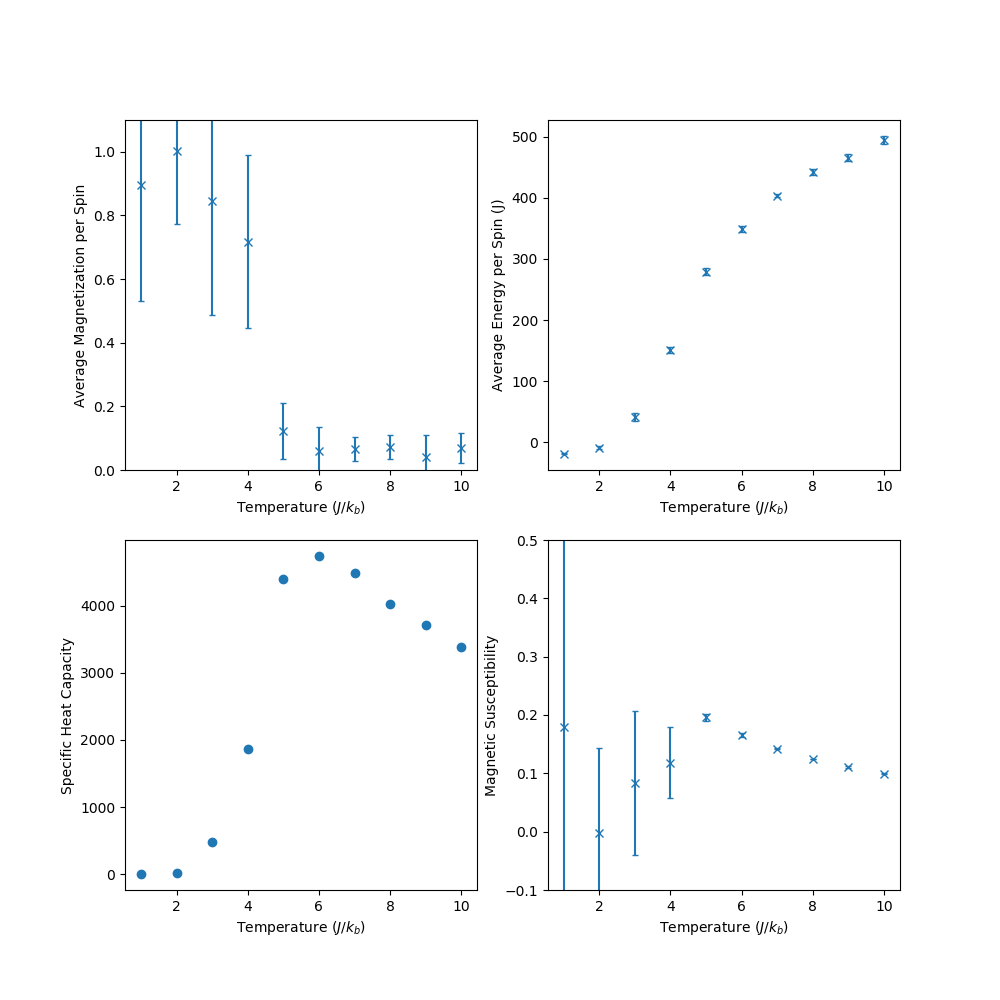

In [797]:
#Fit a line to data and determine line of greatest slope to approximate the Curie Temperature 
m=1
for i in range(len(Amag)-3):
    xd=[Tdata[i+n] for n in range(3)]
    yd=[Amag[i+n] for n in range(3)]
    if np.polynomial.polynomial.polyfit(xd, yd, 1)[1]<m:
        A=np.polynomial.polynomial.polyfit(xd, yd, 1)[0]
        B=np.polynomial.polynomial.polyfit(xd, yd, 1)[1]
        m=B
        Tc=Tdata[i]

#Plot data accumulated
fig=plt.figure(figsize=(10,10))
fig1=fig.add_subplot(2,2,1)
plt.xlabel("Temperature ($J/k_b)$")
plt.ylabel("Average Magnetization per Spin")
plt.errorbar(Tdata,Amag,yerr=Amagerr, fmt='x',capsize=2)
#plt.plot(Tdata, A + Tdata*B, "--")
plt.ylim([0,1.1])

fig2=fig.add_subplot(2,2,2)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Average Energy per Spin (J)")
plt.errorbar(Tdata,Aenergy,yerr=Aenergyerr, fmt="x",capsize=2)

fig3=fig.add_subplot(2,2,3)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Specific Heat Capacity")
plt.plot(Tdata, heatcapacity, "o")

fig4=fig.add_subplot(2,2,4)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Magnetic Susceptibility")
plt.errorbar(Tdata, susceptibility,yerr=susceptiblityerr, fmt="x",capsize=2)
plt.ylim([-0.1,0.5])

plt.show()

In [798]:
print(Tc)

3.0


# Triangular Lattice

<IPython.core.display.Javascript object>


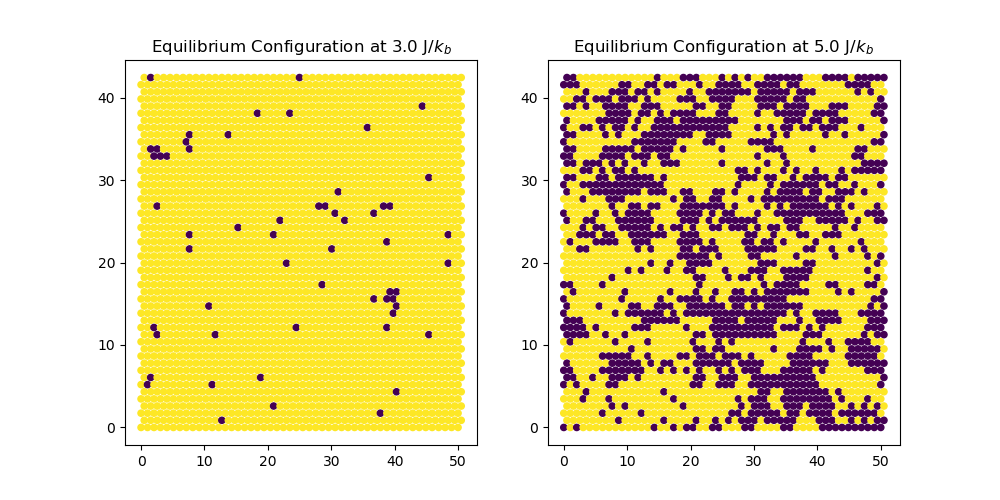

In [792]:
#Plotting examples of equilibirum states at two different temperatures
fig=plt.figure(figsize=(10,5))


#initialise lattice
M=IsingModel(temperature=3.0, dim=50, grid_type="triangular")
M.solve()

#plotting data
fig1=fig.add_subplot(121)
fig1.set_title("Equilibrium Configuration at $3.0$ J/$k_b$")
g1=M.plot(fig1)

#-------------------------------------------------------------------------------------------------------------------

#initialise lattice
M=IsingModel(temperature=5.0, dim=50, grid_type="triangular")
M.solve()

#plotting data
fig2=fig.add_subplot(122)
fig2.set_title("Equilibrium Configuration at $5.0$ J/$k_b$")
g2=M.plot(fig2)
plt.show()

<IPython.core.display.Javascript object>


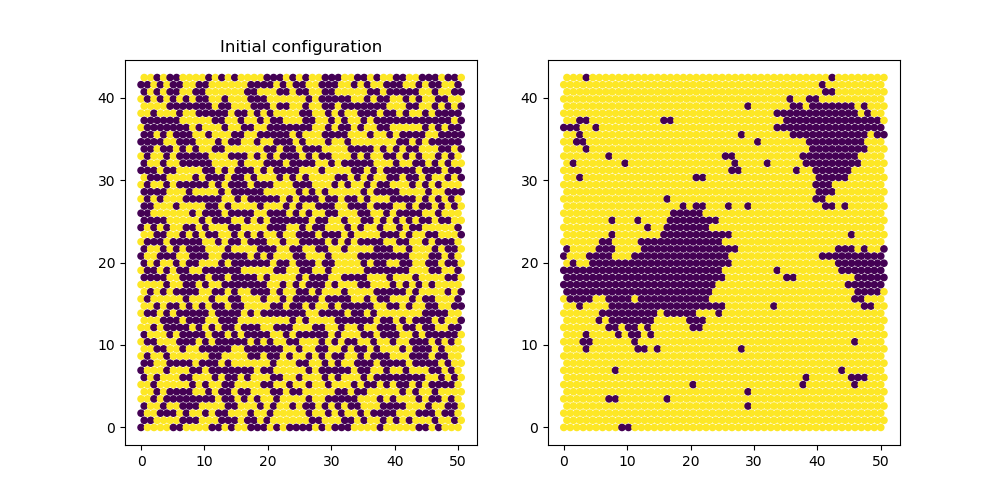

In [8]:
#animate the solving of a lattice
M=IsingModel(temperature=3.0, dim=50, grid_type="triangular")

fig=plt.figure(figsize=(10,5))

fig1=fig.add_subplot(121)
fig1.set_title("Initial configuration")
g1=M.plot(fig1)

fig2=fig.add_subplot(122)
g2=M.plot(fig2)


#FuncAnimation used to animate the solving of the matrix
ani = animation.FuncAnimation(fig, M.animate,interval=100,frames=100, blit=True, repeat=False, fargs=(g2,))
plt.show()

In [801]:
#Calculating a number of obserables
Amag=[]
Amagerr=[]
Aenergy=[]
Aenergyerr=[]
heatcapacity=[]
heatcapacityerr=[]
susceptibility=[]
susceptiblityerr=[]

Tdata=np.linspace(0.5,10.0, 20)
for T in Tdata:
    print(T)#To indicate progress of code
    
    #Initialise empty lists to store data
    data=[]
    test=[]
    
    #Find solution configuration for a number of random configuration to get an average
    for i in range(10):
        M=IsingModel(temperature=T, dim=10, grid_type="triangular")
        M.solve()
        data.append([abs(M.present_mag), M.present_energy/100, (1.0/(T))*(1-(M.present_mag)**2)])
        test.append(abs(M.present_mag))
        
    #calculate standard devation of data set
    sd=np.std(test)
    mean=sum(test)/10
    
    #Neglecting outliers of data set
    neglectingOutliers = np.array([data[i] for i in range(10) if (abs(test[i] - mean)<=sd)])
    mean=sum(list(neglectingOutliers))/len(neglectingOutliers)
    
    Amag.append(mean[0])
    Aenergy.append(mean[1])
    susceptibility.append(mean[2])
    
    data= np.array(data).transpose().tolist()
    
    #Create errorbars indicating the neglected outliers
    Amagerr.append(np.std(data[0]))
    Aenergyerr.append(np.std(data[1]))
    susceptiblityerr.append(np.std(data[2]))

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


In [569]:

heatcapacity=[]
for T in Tdata:
    print(T)#indicate progress
    
    E=0
    sqE=0
    data=[]
    test=[]
    
    M=IsingModel(temperature=T, dim=10)
    
    #Bring to equilibirum
    M.solve()
    
    #Calculate average values of energy and energy squared over thermal fluxuations
    for i in range(200):
        E+=M.present_energy
        sqE+=M.present_energy**2
        M.single_update()
    E=E/(200*M.dim**2)
    sqE=sqE/(200*M.dim**4)
    data.append((sqE-E**2)/(T**2))
    heatcapacity.append(data)

0.5
2.875
5.25
7.625
10.0


<IPython.core.display.Javascript object>


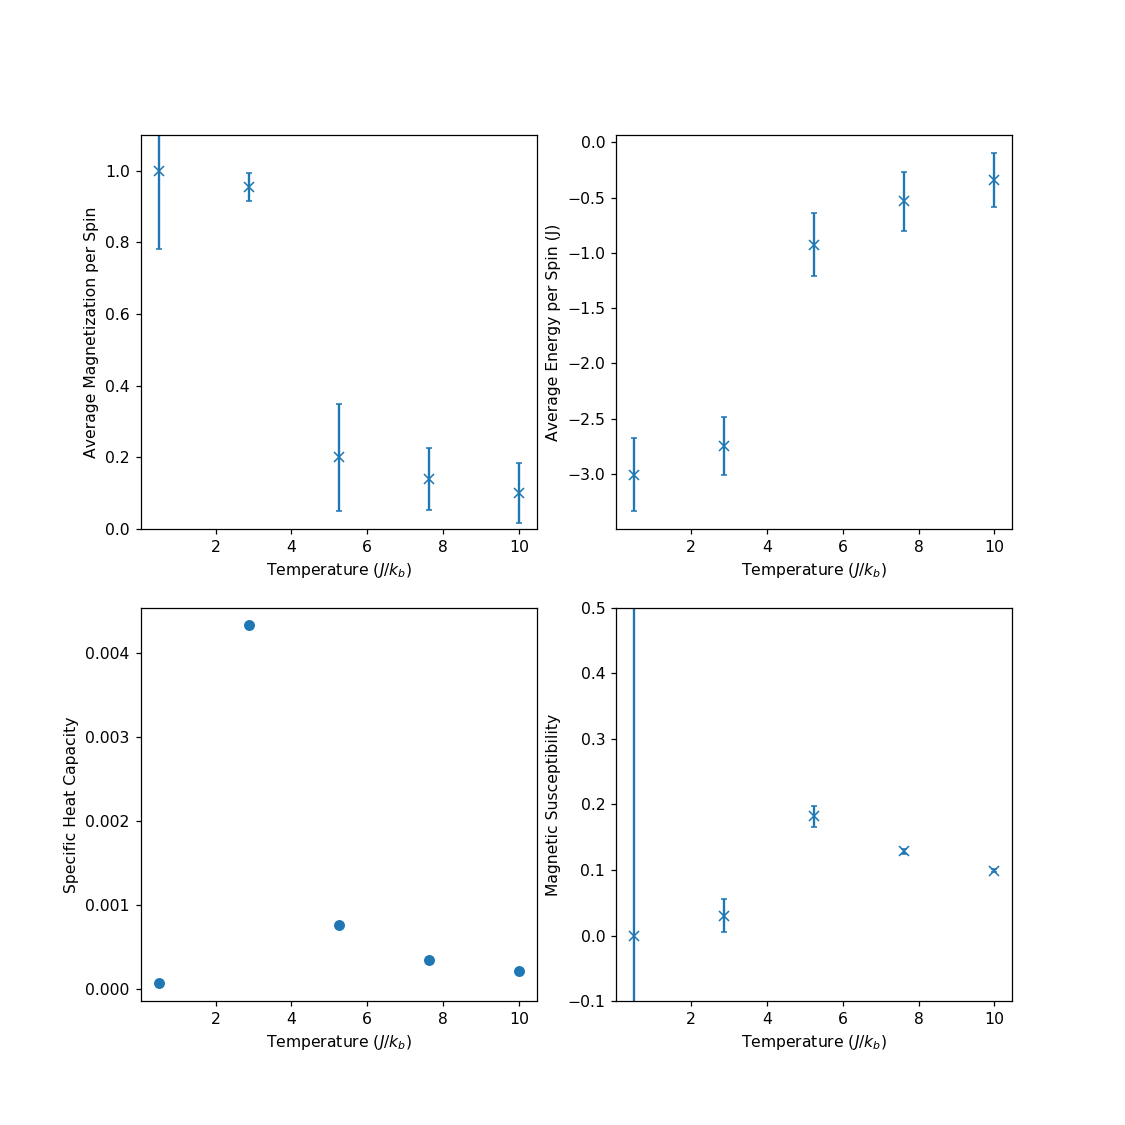

In [571]:
#plot data

m=1
for i in range(len(Amag)-3):
    xd=[Tdata[i+n] for n in range(3)]
    yd=[Amag[i+n] for n in range(3)]
    if np.polynomial.polynomial.polyfit(xd, yd, 1)[1]<m:
        A=np.polynomial.polynomial.polyfit(xd, yd, 1)[0]
        B=np.polynomial.polynomial.polyfit(xd, yd, 1)[1]
        m=B
        Tc=Tdata[i]

fig=plt.figure(figsize=(10,10))
fig1=fig.add_subplot(2,2,1)
plt.xlabel("Temperature ($J/k_b)$")
plt.ylabel("Average Magnetization per Spin")
plt.errorbar(Tdata,Amag,yerr=Amagerr, fmt='x',capsize=2)
#plt.plot(Tdata, A + Tdata*B, "--")
plt.ylim([0,1.1])

fig2=fig.add_subplot(2,2,2)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Average Energy per Spin (J)")
plt.errorbar(Tdata,Aenergy,yerr=Aenergyerr, fmt="x",capsize=2)

fig3=fig.add_subplot(2,2,3)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Specific Heat Capacity")
plt.plot(Tdata, heatcapacity, "o")

fig4=fig.add_subplot(2,2,4)
plt.xlabel("Temperature ($J/k_b$)")
plt.ylabel("Magnetic Susceptibility")
plt.errorbar(Tdata, susceptibility,yerr=susceptiblityerr, fmt="x",capsize=2)
plt.ylim([-0.1,0.5])

plt.show()

## NiO

In [ ]:
#Plotting examples of equilibirum states at two different temperatures 
fig=plt.figure(figsize=(10,5))

M=IsingModel(grid_type="NiO", J=[2.3,-21], temperature=1)
M.solve()

#plot lattice
fig1=fig.add_subplot(121)
fig1.set_title("Equilibrium Configuration at 1meV/$k_b$")
g1=M.plot(fig1)


#-------------------------------------------------------------------------------------------------------------------
M=IsingModel(grid_type="NiO", J=[2.3,-21], temperature=100)
M.solve()

#plot lattice
fig2=fig.add_subplot(122)
fig2.set_title("Equilibrium Configuration at 100meV/$k_b$")
g2=M.plot(fig2)
plt.show()

<IPython.core.display.Javascript object>

In [576]:
#Calculating a number of obserables


#Initialise empty lists to store data
Amag=[]
Amagerr=[]
Aenergy=[]
Aenergyerr=[]


#Inserting values in terms of meV/kb
Tdata=np.linspace(1, 50, 10)

for T in Tdata:
    print(T)#To indicate progress of code 
    
    #For storage
    data=[]
    test=[]
    
    #Find solution configuration for a number of random configuration to get an average
    for i in range(10):
        #interacting constant put in terms meV
        M=IsingModel(temperature=T, dim=20, J=[2.3,-21], grid_type="NiO")
        
        M.solve()
        data.append([abs(M.magnet()), 2*M.Energy()/(M.dim**2), (1.0/(T))*(1-(M.present_mag)**2)])
        test.append(abs(M.present_mag))
    #calculate standard devation of data set
    sd=np.std(test)
    mean=sum(test)/10
    
    #Neglecting outliers of data set
    neglectingOutliers = np.array([data[i] for i in range(10) if (abs(test[i] - mean)<=sd)])
    mean=sum(list(neglectingOutliers))/len(neglectingOutliers)
	
    Amag.append(mean[0])
    Aenergy.append(mean[1])
    
    data= np.array(data).transpose().tolist()
    
    #Create errorbars indicating the neglected outliers
    Amagerr.append(np.std(data[0]))
    Aenergyerr.append(np.std(data[1]))

1.0
6.444444444444445
11.88888888888889
17.333333333333336
22.77777777777778
28.22222222222222
33.66666666666667
39.111111111111114
44.55555555555556
50.0


<IPython.core.display.Javascript object>


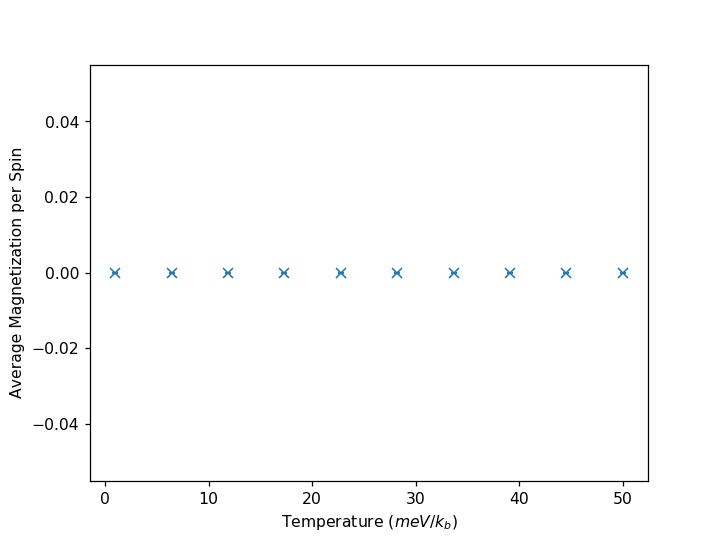

<IPython.core.display.Javascript object>


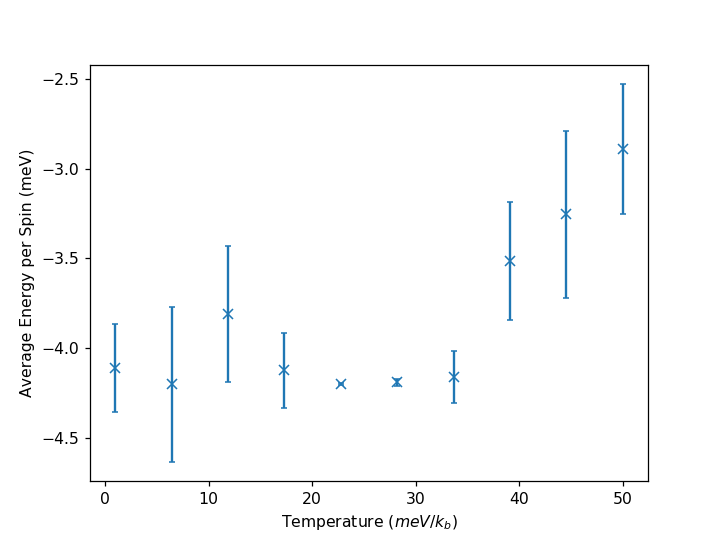

In [574]:
#Plot data created
A=0
for i in range(len(Amag)-3):
    xd=[Tdata[i+n] for n in range(3)]
    yd=[Aenergy[i+n] for n in range(3)]
    if abs(np.polynomial.polynomial.polyfit(xd, yd, 1)[1])<=0.001:
        A=np.polynomial.polynomial.polyfit(xd, yd, 1)[0]
        B=np.polynomial.polynomial.polyfit(xd, yd, 1)[1]


plt.figure()
plt.xlabel("Temperature ($meV/k_b)$")
plt.ylabel("Average Magnetization per Spin")
plt.errorbar(Tdata,Amag,yerr=Amagerr, fmt='x',capsize=2)
#plt.plot(Tdata, A2 + Tdata*B2, "--")

plt.figure()
plt.xlabel("Temperature ($meV/k_b$)")
plt.ylabel("Average Energy per Spin (meV)")
plt.errorbar(Tdata,Aenergy,yerr=Aenergyerr, fmt="x",capsize=2)
#plt.plot(Tdata, A+Tdata*B, "--")


plt.show()